In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import json
import numpy as np
import statsmodels.api as sm

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
weight = pd.read_csv('저체중률_20231101201513.csv')
weight.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],axis=0,inplace=True)
weight.drop(['구분별(1)','구분별(2)'],axis=1,inplace=True)
weight.drop(['2019.1','2019.2','2020','2020.1','2020.2','2021','2021.1','2021.2'],axis=1,inplace=True)
weight.rename(columns={'구분별(3)':'자치구','2019':'저체중률'}, inplace=True)
weight.reset_index(drop=True, inplace=True)
weight['저체중률'] = weight['저체중률'].astype('float')

In [3]:
weight

,자치구,저체중률
0,종로구,5.3
1,중구,5.3
2,용산구,3.8
3,성동구,6.7
4,광진구,6.5
5,동대문구,2.7
6,중랑구,3.7
7,성북구,4.8
8,강북구,5.7
9,도봉구,4.8


In [127]:
weight.to_csv('저체중률.csv')

In [3]:
group1 = pd.read_csv('group1.csv')
group1.drop('Unnamed: 0', axis=1, inplace=True)
group1=group1[['자치구','행정동', '기초생활수급자인원', '노년부양비', '독거노인수', '고령내국인전체', '노령화지수', '무료급식소개수']]
group1.iloc[249,0]='관악구'
group1

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수
0,동대문구,회기동,364.0,13.8,99.0,1552.0,230.5,0.0
1,동대문구,휘경1동,386.0,16.6,128.0,2164.0,200.1,0.0
2,동대문구,휘경2동,703.0,22.1,215.0,4106.0,214.2,0.0
3,동대문구,청량리동,1741.0,43.8,915.0,5443.0,473.3,1.0
4,동대문구,용신동,1680.0,22.3,761.0,6103.0,250.0,0.0
...,...,...,...,...,...,...,...,...
274,강동구,암사1동,1922.0,25.3,619.0,6290.0,208.4,0.0
275,강동구,천호2동,2002.0,24.3,713.0,6109.0,250.6,1.0
276,강동구,길동,1637.0,25.4,513.0,8474.0,245.5,0.0
277,강동구,상일1동,396.0,18.0,132.0,4835.0,65.3,0.0


In [5]:
group1.iloc[:,[2,3,5,6,7]].corr()

,기초생활수급자인원,노년부양비,고령내국인전체,노령화지수,무료급식소개수
기초생활수급자인원,1.000000,0.518688,0.632387,0.414589,0.318194
노년부양비,0.518688,1.000000,0.390248,0.565012,0.125088
고령내국인전체,0.632387,0.390248,1.000000,0.116608,0.087564
노령화지수,0.414589,0.565012,0.116608,1.000000,0.122150
무료급식소개수,0.318194,0.125088,0.087564,0.122150,1.000000


In [67]:
group1

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수
0,동대문구,회기동,364.0,13.8,99.0,1552.0,230.5,0.0
1,동대문구,휘경1동,386.0,16.6,128.0,2164.0,200.1,0.0
2,동대문구,휘경2동,703.0,22.1,215.0,4106.0,214.2,0.0
3,동대문구,청량리동,1741.0,43.8,915.0,5443.0,473.3,1.0
4,동대문구,용신동,1680.0,22.3,761.0,6103.0,250.0,0.0
5,동대문구,제기동,1577.0,30.6,772.0,5830.0,391.6,0.0
6,동대문구,전농1동,1837.0,27.8,807.0,5795.0,237.6,0.0
7,동대문구,전농2동,805.0,29.5,330.0,3807.0,203.3,0.0
8,동대문구,답십리2동,1313.0,24.0,566.0,5774.0,189.1,0.0
9,동대문구,장안1동,1620.0,23.4,481.0,6780.0,133.2,1.0


In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data2 = pd.DataFrame(ss.fit_transform(group1.iloc[:,[2,3,5,6,7]]))
data2=pd.concat([group1.iloc[:,[0,1]],data2],axis=1)
data2.rename(columns={0:'기초생활수급자인원',1:'노년부양비',2:'고령자수',3:'노령화지수',4:'무료급식소개수'},inplace=True)

data2

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is de

,자치구,행정동,기초생활수급자인원,노년부양비,고령자수,노령화지수,무료급식소개수
0,동대문구,회기동,-1.027997,-1.823866,-1.856009,0.031865,-0.629652
1,동대문구,휘경1동,-0.997669,-1.361282,-1.452783,-0.291462,-0.629652
2,동대문구,휘경2동,-0.560667,-0.452636,-0.173267,-0.141498,-0.629652
3,동대문구,청량리동,0.870274,3.132388,0.707635,2.614230,0.798584
4,동대문구,용신동,0.786182,-0.419594,1.142486,0.239263,-0.629652
5,동대문구,제기동,0.644191,0.951636,0.962616,1.745287,-0.629652
6,동대문구,전농1동,1.002615,0.489053,0.939556,0.107379,-0.629652
7,동대문구,전농2동,-0.420054,0.769907,-0.370268,-0.257427,-0.629652
8,동대문구,답십리2동,0.280252,-0.138740,0.925720,-0.408455,-0.629652
9,동대문구,장안1동,0.703469,-0.237865,1.588538,-1.002995,0.798584


In [21]:
from statsmodels.formula.api import ols

ols('저체중률 ~ 기초생활수급자인원+노년부양비+고령내국인전체+노령화지수+무료급식소개수', data=data2).fit().summary()

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   저체중률   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.783
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.116
Time:                        09:59:46   Log-Likelihood:                -391.40
No. Observations:                 279   AIC:                             794.8
Df Residuals:                     273   BIC:                             816.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.986e-16      0.060  -3.34e-15      1.000      -0.117       0.117
기초생활수급자인원     -0.0774      0.092     -0.841      0.401      -0.259       0.104
노년부양비         -0.0303      0.080     -0.379      0.705      -0.187       0.127
고령내국인전체       -0.1095      0.081     -1.345      0.180      -0.270       0.051
노령화지수          0.0167      0.076      0.219      0.827      -0.134       0.167
무료급식소개수        0.0457      0.064      0.718      0.474      -0.080       0.171
==============================================================================
Omnibus:                        3.285   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.219
Skew:                          -0.263   Prob(JB):                        0.200
Kurtosis:                       2.973   Cond. No.                         3.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
group1_score = group1.copy()
group1_score= group1_score[['자치구','행정동']]
group1_score['점수'] = 0
group1_score['점수'] = group1_score['점수'].astype('float')
group1_scoredata2.iloc[:,0:5].corr()

NameError: name 'group1' is not defined

In [141]:
data = final_group1.copy()
data.head(1)

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수,저체중률
0,동대문구,회기동,364.0,13.8,99.0,1552.0,230.5,0.0,2.7


# ahp분석 (여기부터 참고바람)

In [32]:
c1 = pd.DataFrame([1.000000, 0.750036, 0.816814, 0.757333, 0.957149])
c2 = pd.DataFrame([1.333269, 1.000000, 0.742921, 0.658245, 1.130582])
c3 = pd.DataFrame([1.224269, 1.346038, 1.000000, 0.8479, 1.138852])
c4 = pd.DataFrame([1.320423, 1.519192, 1.179385, 1.000000, 1.857807])
c5 = pd.DataFrame([1.044769, 0.8845, 0.878077, 0.538269, 1.000000])
data_ahp = pd.concat([c1,c2,c3,c4,c5], axis=1)
columns = ['기초생활수급자인원','고령자수','노년부양비','노령화지수','무료급식소개수']
data_ahp.columns = columns
data_ahp2 = data_ahp.copy() 
data_ahp2 = data_ahp2.rename({0:'기초생활수급자인원', 1:'고령자수', 2:'노년부양비', 3:'노령화지수', 4:'무료급식소개수'}, axis=0)
data_ahp2

,기초생활수급자인원,고령자수,노년부양비,노령화지수,무료급식소개수
기초생활수급자인원,1.000000,1.333269,1.224269,1.320423,1.044769
고령자수,0.750036,1.000000,1.346038,1.519192,0.884500
노년부양비,0.816814,0.742921,1.000000,1.179385,0.878077
노령화지수,0.757333,0.658245,0.847900,1.000000,0.538269
무료급식소개수,0.957149,1.130582,1.138852,1.857807,1.000000


In [5]:
colums_cnt= len(data_ahp.columns)
colums_cnt

5

In [33]:
from scipy.stats.mstats import gmean
geo_mean_list = []
for i in data_ahp:
    geo_mean_list.append(gmean(data_ahp[i]))
    
# 기하평균 출력
print('기하평균 (Geometric mean)\n')
for i,j in zip(data_ahp, geo_mean_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

기하평균 (Geometric mean)

기초생활수급자인원 : 0.8501476185378171
고령자수 : 0.940827515547597
노년부양비 : 1.0973602371779767
노령화지수 : 1.3446101585321193
무료급식소개수 : 0.847324993719219


In [7]:
pd.Series(geo_mean_list)

0    0.850148
1    0.940828
2    1.097360
3    1.344610
4    0.847325
dtype: float64

In [8]:
# 가중치 계산을 위하여 기하평균의 합을 구함
geo_mean_sum = sum(geo_mean_list)
geo_mean_sum

5.080270523514729

In [9]:
# 각 컬럼의 가중치를 계산하여 리스트에 저장
weights_list = []
for i in range(colums_cnt):
    weights_list.append(geo_mean_list[i]/geo_mean_sum)

In [34]:
#기하평균 출력
print('가중치 (Weights)\n')
for i,j in zip(data_ahp, weights_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

가중치 (Weights)

기초생활수급자인원 : 0.16734298195397118
고령자수 : 0.1851924048518377
노년부양비 : 0.21600429191687615
노령화지수 : 0.2646729445426984
무료급식소개수 : 0.1667873767346166


In [11]:
#가중치 합 확인
su_ = sum(list(weights_list))
print(su_)

1.0


In [35]:
index=['기초생활수급자인원','고령자수','노년부양비','노령화지수','무료급식소개수']
가중치 = pd.DataFrame(weights_list, index=index)
가중치.rename(columns={0:'가중치'}, inplace=True)
가중치

,가중치
기초생활수급자인원,0.167343
고령자수,0.185192
노년부양비,0.216004
노령화지수,0.264673
무료급식소개수,0.166787


In [37]:
x = list(가중치.index)
y = weights_list

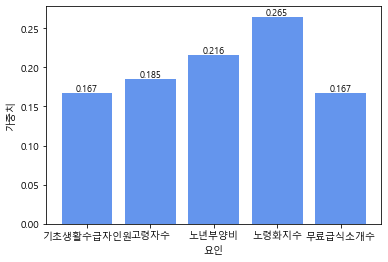

In [38]:
#그래프 한글 출력을 위함
plt.rcParams['font.family'] = 'Malgun Gothic' 

plt.bar(x, y, color=['cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','black'])
plt.xlabel('요인')
plt.ylabel('가중치')


for i, v in enumerate(x):
    plt.text(v, y[i],round(y[i],3),                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom', # verticalalignment (top, center, bottom)
            )    
    
plt.show()

# 일관성 검사

In [39]:
def AHP_5(a, b, c, d, e, f, g, h, i, j): # 요소가 5개인 경우 AHP분석 함수    
    np01 = np.array([[1, a, b, c, d], [1/a, 1, e, f, g], [1/b, 1/e, 1, h, i], [1/c, 1/f, 1/h, 1, j], [1/d, 1/g, 1/i, 1/j, 1]])    
    col_sums = np01.sum(axis=0)    
    np02 = np01 / col_sums[np.newaxis, :]    
    row_avg = np02.mean(axis=1) # 최종중요도(가중치)    
    np03 = np01.dot(row_avg[:, np.newaxis])/row_avg[:, np.newaxis]    
    consistency = (np03.mean(axis=0)-5)/4  # 일관성 지수    
    return row_avg, consistency

In [40]:
data_ahp

,기초생활수급자인원,고령자수,노년부양비,노령화지수,무료급식소개수
0,1.000000,1.333269,1.224269,1.320423,1.044769
1,0.750036,1.000000,1.346038,1.519192,0.884500
2,0.816814,0.742921,1.000000,1.179385,0.878077
3,0.757333,0.658245,0.847900,1.000000,0.538269
4,0.957149,1.130582,1.138852,1.857807,1.000000


In [41]:
a = gmean(data_ahp.iloc[0,1])
b = gmean(data_ahp.iloc[0,2])
c = gmean(data_ahp.iloc[0,3])
d = gmean(data_ahp.iloc[0,4])
e = gmean(data_ahp.iloc[1,2])
f = gmean(data_ahp.iloc[1,3])
g = gmean(data_ahp.iloc[1,4])
h = gmean(data_ahp.iloc[2,3])
i = gmean(data_ahp.iloc[2,4])
j = gmean(data_ahp.iloc[3,4])
for x, y in zip([a, b, c, d, e, f, g, h, i, j], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']):    
    print('기하평균({}) : {}'.format(y, x))
    row_avg, consistency = AHP_5(a, b, c, d, e, f, g, h, i, j)
for i, j in zip(['기초생활수급자인원', '고령자수', '노년부양비', '노령화지수', '무료급식소개수'], row_avg):    
    print('최종 중요도({}) : {}'.format(i, j))
print('일관성 지수 : {}'.format(consistency[0])) #일관성 지수 1미만이면 굿임

기하평균(a) : 1.333269
기하평균(b) : 1.224269
기하평균(c) : 1.320423
기하평균(d) : 1.044769
기하평균(e) : 1.346038
기하평균(f) : 1.519192
기하평균(g) : 0.8845
기하평균(h) : 1.179385
기하평균(i) : 0.878077
기하평균(j) : 0.538269
최종 중요도(기초생활수급자인원) : 0.2320726830770718
최종 중요도(고령자수) : 0.20948236066329357
최종 중요도(노년부양비) : 0.17940107264763885
최종 중요도(노령화지수) : 0.14681106592583232
최종 중요도(무료급식소개수) : 0.2322328176861635
일관성 지수 : 0.007002518533343771


# 점수 산정

In [42]:
group1_score = group1.copy()
group1_score= group1_score[['자치구','행정동']]
group1_score['점수'] = 0
group1_score['순위'] = 0
group1_score['점수'] = group1_score['점수'].astype('float')
group1_score['순위'] = group1_score['순위'].astype('int')
group1_score.head()

,자치구,행정동,점수,순위
0,동대문구,회기동,0.0,0
1,동대문구,휘경1동,0.0,0
2,동대문구,휘경2동,0.0,0
3,동대문구,청량리동,0.0,0
4,동대문구,용신동,0.0,0


In [43]:
def score(dataframe1, dataframe2):
    for i in range(len(dataframe1)):
        dataframe1.loc[i,'점수'] = 0.167 * dataframe2.loc[i,'기초생활수급자인원'] + 0.185 * dataframe2.loc[i,'고령자수'] + 0.216 * dataframe2.loc[i,'노년부양비'] + 0.265 * dataframe2.loc[i,'노령화지수'] + 0.167 * dataframe2.loc[i,'무료급식소개수']
    dataframe1 = dataframe1.sort_values('점수', ascending=False)
    dataframe1 = dataframe1.reset_index(drop=True)
def rank(dataframe):
    for j in range(len(dataframe)):
        dataframe.loc[j,'순위'] = j+1

In [144]:
group1_score.loc[0,'순위']

0

In [44]:
pd.set_option('display.max_rows', None)
score(group1_score,data2)

group1_score = group1_score.sort_values('점수', ascending=False)
group1_score.reset_index(drop=True,inplace=True)

rank(group1_score)
group1_score

,자치구,행정동,점수,순위
0,강서구,가양2동,3.055430,1
1,강서구,등촌3동,2.987702,2
2,도봉구,도봉1동,1.854810,3
3,동대문구,청량리동,1.778978,4
4,노원구,중계2.3동,1.581489,5
5,강북구,번3동,1.500283,6
6,강서구,가양3동,1.455534,7
7,강서구,방화3동,1.410054,8
8,노원구,상계3.4동,1.313896,9
9,관악구,삼성동,1.313290,10
